In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
pip install matplotlib


     ---------------------------------------- 7.2/7.2 MB 6.8 MB/s eta 0:00:00
     -------------------------------------- 957.2/957.2 kB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
print(tf.__version__)

2.9.1


In [2]:
Image_Size=256
Batch_Size=32
CHANNELS = 3
EPOCHS=30


In [3]:
#import all datasets from yuour HARDISK
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle="True",
    image_size=(Image_Size,Image_Size),
    batch_size=Batch_Size
    
)

Found 4500 files belonging to 3 classes.


In [4]:
# len(dataset) #141*32=4500(approx)\
class_names=dataset.class_names
class_names

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

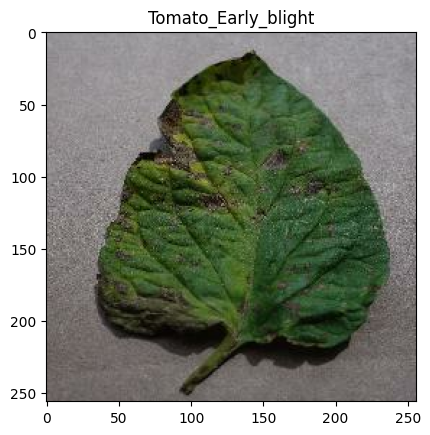

In [7]:
#showing image of batch 1 random shuffle
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    

In [8]:
len(dataset)

141

In [9]:
# 80%=training
# 10%= validaation 10%= test
train_size=0.8
len(dataset)*train_size

112.80000000000001

In [10]:
train_dataset=dataset.take(112)
len(train_dataset)

112

In [11]:
test_dataset=dataset.skip(112)
len(test_dataset)

29

In [12]:
size_val=0.1
len(dataset)*size_val

    

14.100000000000001

In [13]:
validation_dataset=test_dataset.take(14)
len(validation_dataset)

14

In [14]:
test_dataset=test_dataset.skip(14)
len(test_dataset)

15

In [15]:
def get_dataset_partition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_dataset=ds.take(train_size)
    valid_dataset=ds.skip(train_size).take(val_size)
    test_dataset=ds.skip(train_size).skip(val_size)
    
    
    
    
    return train_dataset,valid_dataset,test_dataset
    

In [16]:
train_dataset,valid_dataset,test_dataset= get_dataset_partition(dataset)

In [17]:
len(train_dataset)


112

In [18]:
len(valid_dataset)


14

In [19]:
len(test_dataset)


15

In [22]:
resize_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_Size,Image_Size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])

In [28]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])


In [29]:
input_shape = (Batch_Size, Image_Size, Image_Size, CHANNELS)
n_classes=3 #3 neurons
model = models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation="relu", input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')

])

model.build(input_shape = input_shape)

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [29]:
model.compile(
optimizer = "adam",
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics = ["accuracy"]
)


In [24]:
history=model.fit(
    train_dataset,
    epochs=EPOCHS,
    batch_size=Batch_Size,
    verbose=1,
    validation_data=valid_dataset
    


)

Epoch 1/30
112/112 [==============================] - 206s 2s/step - loss: 0.8517 - accuracy: 0.6019 - val_loss: 0.4855 - val_accuracy: 0.8096
Epoch 2/30
112/112 [==============================] - 225s 2s/step - loss: 0.4509 - accuracy: 0.8124 - val_loss: 0.3203 - val_accuracy: 0.8527
Epoch 3/30
112/112 [==============================] - 214s 2s/step - loss: 0.3376 - accuracy: 0.8564 - val_loss: 0.4307 - val_accuracy: 0.8192
Epoch 4/30
112/112 [==============================] - 210s 2s/step - loss: 0.3286 - accuracy: 0.8620 - val_loss: 0.5343 - val_accuracy: 0.8036
Epoch 5/30
112/112 [==============================] - 211s 2s/step - loss: 0.2669 - accuracy: 0.8908 - val_loss: 0.4126 - val_accuracy: 0.8371
Epoch 6/30
112/112 [==============================] - 210s 2s/step - loss: 0.2827 - accuracy: 0.8802 - val_loss: 0.6457 - val_accuracy: 0.8147
Epoch 7/30
112/112 [==============================] - 207s 2s/step - loss: 0.2306 - accuracy: 0.9065 - val_loss: 0.4805 - val_accuracy: 0.8372

In [30]:
evaluate=model.evaluate(test_dataset)

15/15 [==============================] - 16s 519ms/step - loss: 1.1077 - accuracy: 0.2313


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [27]:
# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [20]:
from keras.models import load_model

In [21]:
model = load_model('model.h5')

In [22]:
evaluate=model.evaluate(test_dataset)


15/15 [==============================] - 27s 501ms/step - loss: 0.1972 - accuracy: 0.9271


first image to predict
actual label: Tomato_healthy
1/1 [==============================] - 2s 2s/step
predicted label: Tomato_healthy


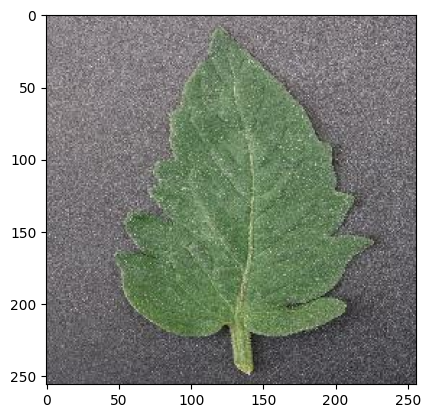

In [23]:
import numpy as np
for images_batch, labels_batch in test_dataset.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [24]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 43ms/step


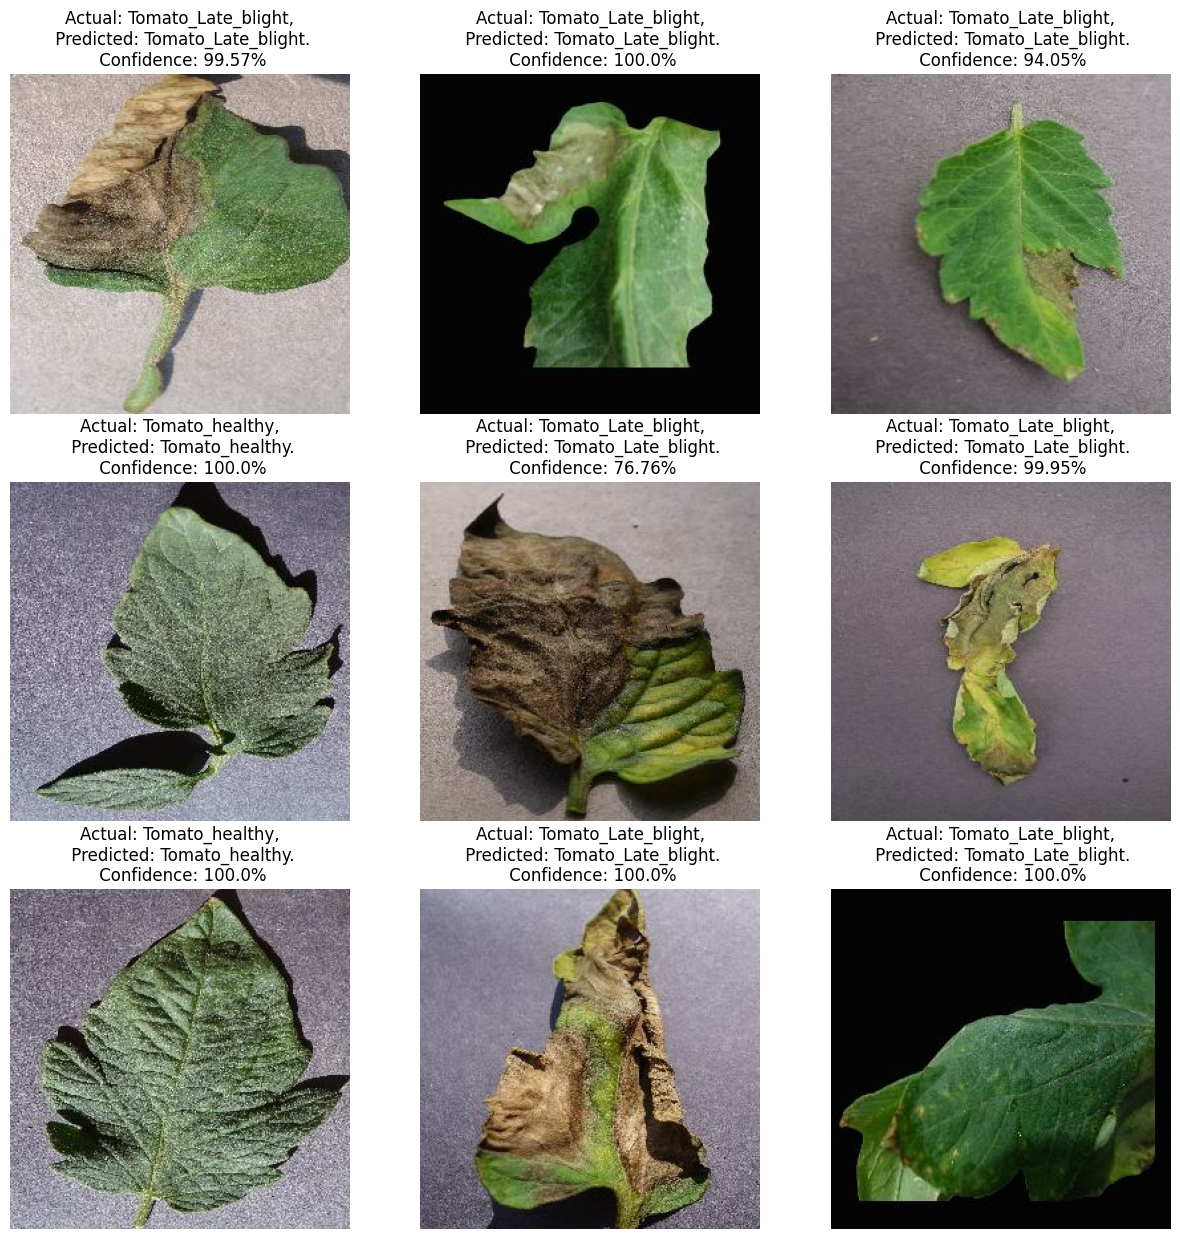

In [25]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")